<a href="https://colab.research.google.com/github/louismagowan/data_volunteering/blob/main/family_engagement_lab-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Codes in original dataset**

Lunch Status: 00 = does not quality for free or reduced-price lunch, 01 = does qualify for free or reduced-price lunch

English proficiency: 1 = proficient in English, 2 = English learner

Special education: 1 = special education, nothing = not receiving 
special education services

FASTalk student: 1 = receiving FASTalk intervention, 0 = not receiving FASTalk intervention

Fall assessment is the baseline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My\ Drive/Data\ Charity\ Stuff/

/content/drive/My Drive/Data Team Charity Stuff


In [ ]:
pwd

'/content/drive/My Drive/Data Team Charity Stuff'

In [ ]:
import sys
sys.path.append('/content/drive/My\ Drive/Data\ Team\ Charity\ Stuff/')

# Import and Clean Data

---



---



---



---





In [ ]:
#@title Import Tools { display-mode: "form" }

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import seaborn as sn
import plots
import seaborn as sn
from scipy import stats
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#@title Define Functions
        
# Define autopercent function
def autopercent(rects):
  for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'{height:,.1f}%',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            ha='center',
            va='bottom',
            rotation=0,
            color="black",
        )        

# Define autocount function
def autocount(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'{height:,.2f}',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            ha='center',
            va='bottom',
            rotation=0,
            color="black",
        )        

def percentagizer(ax):
    ax.yaxis.set_major_formatter(ticker.PercentFormatter())
    
    
def plot_legends(
    axes: list,
    **kwargs,
):
    """Merge & plot all legends from axes in list onto 1 axis
    Arguments:
        axes {list} -- List of Matplotlib axes objects
    Keyword Arguments:
        **kwargs -- kwargs accepted by ax.legend()
    """
    # extract handles and labels from axes
    handles = list()
    labels = list()
    for _ax in axes:
        h, l = _ax.get_legend_handles_labels()
        [handles.append(i) for i in h]
        [labels.append(j) for j in l]
    # set default kwargs
    default_kwargs = dict(
        frameon=False,
        loc=1,
        ncol=4,
    )
    # **kwargs takes precedence, so drop from default if kwarg passed in
    for kwarg in kwargs.keys():
        default_kwargs.pop(kwarg, None)
    # plot legend
    axes[0].legend(
        handles,
        labels,
        **default_kwargs,
        **kwargs
    )

# Set plot formats
plots.set_default_plot_format()
plt.rc("font", weight="regular")


In [ ]:
plots.set_default_plot_format()
# plt.rc("xtick.minor", width=0, size=0)
# plt.rc("xtick.major", width=0, size=0)
# plt.rc("ytick.major", width=0, size=0)
plt.rc("font", weight="regular")
plt.rc("axes", labelweight="regular")

In [ ]:
# Using a custom plotting library to get plot colours
colors = plots.get_plot_colors(jf_template=True)

In [ ]:
data = pd.read_csv('charity_data.csv')

In [ ]:
data.columns

Index(['id', 'school', 'grade', 'gender', 'ethnicity', 'lunch_status',
       'english_proficiency', 'special_education', 'fasttalk_intervention',
       'fall_assessment', 'spring_assessment'],
      dtype='object')

In [ ]:
df = data.copy()

In [ ]:
# Clean Data
df.special_education = df.special_education.fillna(0)

df.fasttalk_intervention = df.fasttalk_intervention.fillna(0)



In [ ]:
# Remove incomplete observations: 87 observations omitted
df = df[~df.spring_assessment.isnull()]

df = df[~df.fall_assessment.isnull()]

In [ ]:
# Recode gender: 0 for M, 1 for F

# Strip spaces
df.gender = df.gender.str.strip()

df.loc[df.gender=='F', 'gender'] = 1
df.loc[df.gender=='M', 'gender'] = 0

In [ ]:
# Recode ethnicity: 0 for BA, 1 for HS
df.loc[df.ethnicity=='BA', 'ethnicity'] = 0
df.loc[df.ethnicity=='HS', 'ethnicity'] = 1

In [ ]:
# Recode english proficiency: 0 for learner, 1 for proficient
df.english_proficiency = np.where(df['english_proficiency'] == 2, 0, 1)

In [ ]:
# Select assessment columns for ease later on
assessments = ['fall_assessment', 'spring_assessment']

# Descriptive Statistics


---



---



---



---



In [ ]:
# compare assessment results
full_comp = df.groupby("fasttalk_intervention")[assessments].mean()
full_comp.index = ["No Intervention", "Intervention"]

# calculate difference
full_comp["diff"] = full_comp["spring_assessment"] - full_comp["fall_assessment"]

In [ ]:
full_comp.round(2)

,fall_assessment,spring_assessment,diff
No Intervention,3.43,3.97,0.54
Intervention,3.13,4.55,1.42


findfont: Font family ['Noto Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Noto Sans'] not found. Falling back to DejaVu Sans.


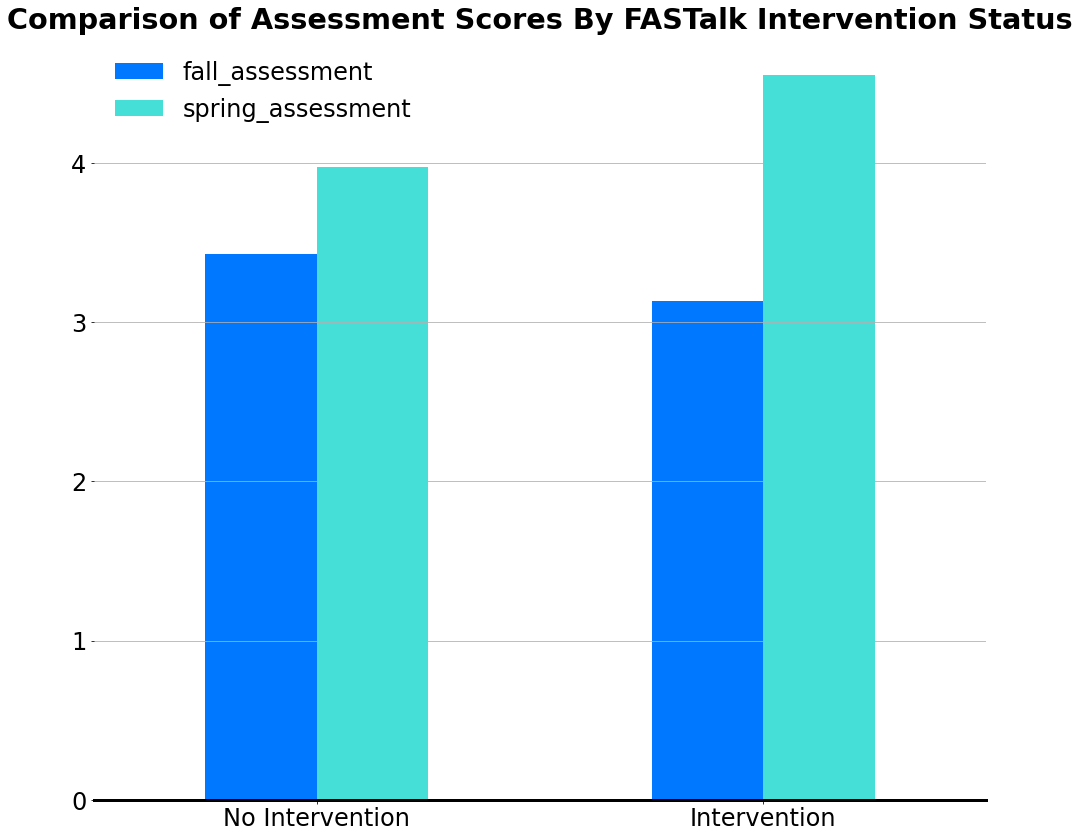

In [ ]:
# plot data
f, ax = plt.subplots(figsize=(16,14))

full_comp[assessments].plot(
    kind="bar",
    ax=ax,
    color=[colors["blue"]["default"], colors["cyan"]["default"]],
    zorder=1,
    label=('Fall Assessment', 'Spring Assessment')
)

# remove spines
[ax.spines[loc].set_visible(False) for loc in ['left', 'top', 'right']]

# rotate x labels
for tick in ax.get_xticklabels():
    tick.set_rotation(0)

# format legend
ax.legend(frameon=False)

# # plot gridlines
ax.yaxis.grid()

ax.set_title('Comparison of Assessment Scores By FASTalk Intervention Status', fontweight='semibold', pad=10)


plt.savefig("/content/drive/My Drive/Data Team Charity Stuff/graphs/scores_by_intervention.png")

In [ ]:
# Check if one group has significantly more special needs students
df.groupby("fasttalk_intervention")[["special_education"]].agg(["sum", "count"])


special_education      
                                    sum count
fasttalk_intervention                        
0.0                                14.0   145
1.0                                 8.0    69

In [ ]:
# Check if one group has significantly more students from low income background
df.groupby("fasttalk_intervention")[["lunch_status"]].agg(["sum", "count"])

lunch_status      
                               sum count
fasttalk_intervention                   
0.0                            137   145
1.0                             60    69

In [ ]:
# Compare assessment results
eng_comp = df.groupby(["fasttalk_intervention","english_proficiency"])[assessments].mean()
eng_comp.index.set_levels(levels=["no_intervention", "intervention"], level=0, inplace=True)
eng_comp.index.set_levels(levels=["proficient", "learner"], level=1, inplace=True)

eng_comp


# Can ignore the 3 to 2 drop among proficient children who received intervention (only 1 data point)

fall_assessment  spring_assessment
fasttalk_intervention english_proficiency                                    
no_intervention       proficient                  3.666667           3.333333
                      learner                     3.422535           3.985915
intervention          proficient                  3.000000           2.000000
                      learner                     3.132353           4.588235

In [ ]:
# Probably not worth looking at the english proficiency as there are so few learner students
df.groupby(["fasttalk_intervention","english_proficiency"])[["lunch_status"]].agg(["sum", "count"])

lunch_status      
                                                   sum count
fasttalk_intervention english_proficiency                   
0.0                   0                              2     3
                      1                            135   142
1.0                   0                              0     1
                      1                             60    68

In [ ]:
# All english learners are also hispanic
df[df["english_proficiency"] == 0]

,id,school,grade,gender,ethnicity,lunch_status,english_proficiency,special_education,fasttalk_intervention,fall_assessment,spring_assessment
3,4,A,3,1,1,0,0,0.0,0.0,6.0,5.0
62,63,A,4,0,1,1,0,0.0,0.0,1.0,4.0
117,118,A,5,1,1,0,0,0.0,1.0,3.0,2.0
133,134,A,5,1,1,1,0,0.0,0.0,4.0,1.0


In [ ]:
# Compare assessment results by gender
sex_comp = df.groupby(["fasttalk_intervention","gender"])[assessments].mean()
sex_comp.index.set_levels(levels=["No Intervention", "Intervention"], level=0, inplace=True)
sex_comp.index.set_levels(levels=["Male", "Female"], level=1, inplace=True)

sex_comp.round(2)

fall_assessment  spring_assessment
fasttalk_intervention gender                                    
No Intervention       Male               3.31               3.71
                      Female             3.56               4.26
Intervention          Male               2.94               4.45
                      Female             3.31               4.64

findfont: Font family ['Noto Sans'] not found. Falling back to DejaVu Sans.


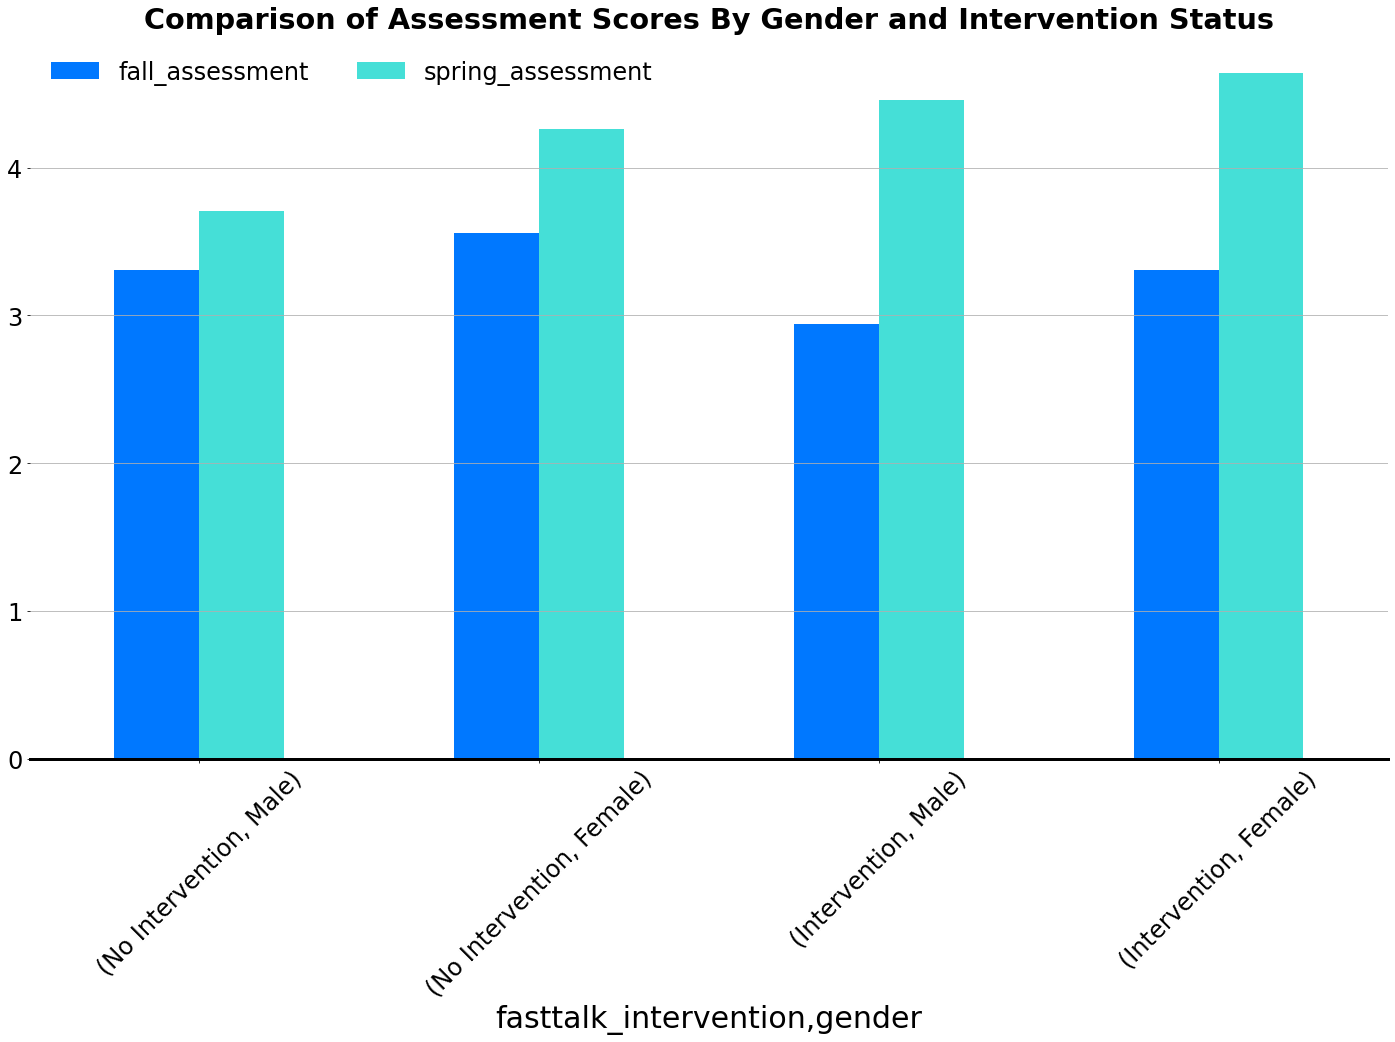

In [ ]:
# Plot data
f, ax = plt.subplots(1,1, figsize=(20,15))

sex_comp[assessments].plot(
    kind="bar",
    ax=ax,
    color=[colors["blue"]["default"], colors["cyan"]["default"]],
    zorder=1
)

# remove spines
[ax.spines[loc].set_visible(False) for loc in ["top", "left", "right"]]

# rotate x labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# format legend
ax.legend(frameon=False, ncol=2)

# plot gridlines
ax.yaxis.grid()

ax.set_title('Comparison of Assessment Scores By Gender and Intervention Status', fontweight='semibold', pad=10)

plt.tight_layout()

plt.savefig("/content/drive/My Drive/Data Team Charity Stuff/graphs/scores_by_gender_and_intervention.png")

In [ ]:
sen_comp = df.groupby(['special_education', 'fasttalk_intervention'])[assessments].mean()

sen_comp.index.set_levels(levels=['No SEN', 'SEN'], level=0, inplace=True)
sen_comp.index.set_levels(levels=['No Intervention', 'Intervention'], level=1, inplace=True)

sen_comp

fall_assessment  spring_assessment
special_education fasttalk_intervention                                    
No SEN            No Intervention               3.473282           4.160305
                  Intervention                  3.213115           4.688525
SEN               No Intervention               3.000000           2.214286
                  Intervention                  2.500000           3.500000

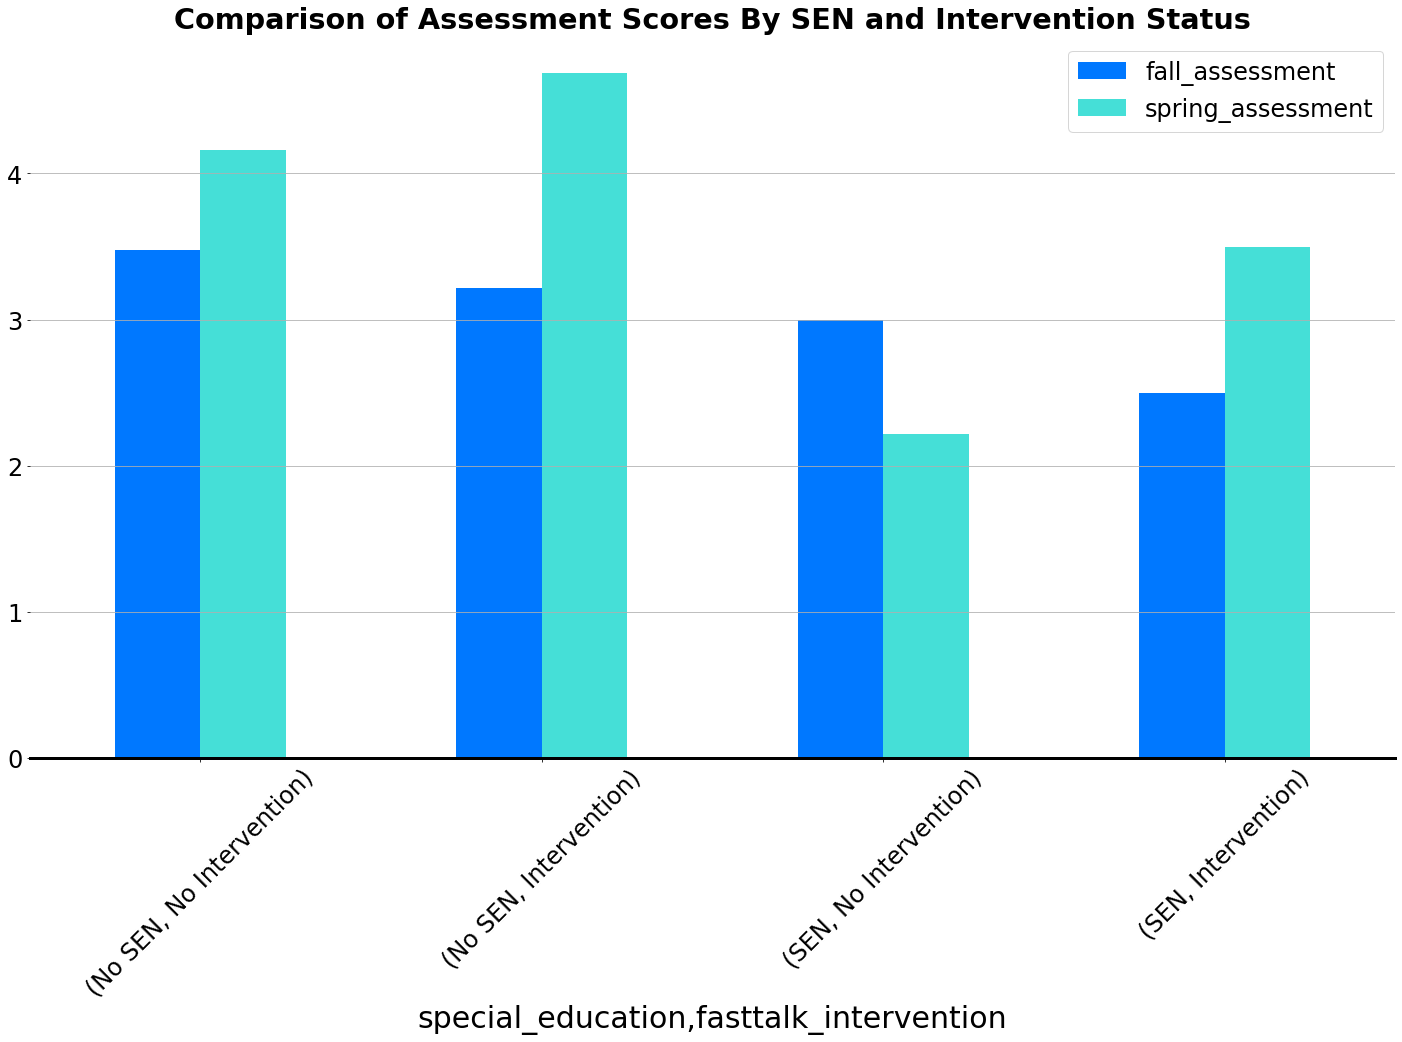

In [ ]:
# Plot data
f, ax = plt.subplots(1,1, figsize=(20,15))

sen_comp.plot(
    kind="bar",
    ax=ax,
    color=[colors["blue"]["default"], colors["cyan"]["default"]],
    zorder=1
)

# remove spines
[ax.spines[loc].set_visible(False) for loc in ["top", "left", "right"]]

# rotate x labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# # format legend
# ax.legend(frameon=False, ncol=2)

# plot gridlines
ax.yaxis.grid()

ax.set_title('Comparison of Assessment Scores By SEN and Intervention Status', fontweight='semibold', pad=10)

plt.tight_layout()

plt.savefig("/content/drive/My Drive/Data Team Charity Stuff/graphs/scores_by_sen_and_intervention.png")

# Inferential Statistics

---



---



---



---



In [ ]:
# Base Model: Only looks at FASTalk intervention and assessment scores?

In [ ]:
# 1st Model: Adds in lunch status

In [ ]:
# 2nd Model: Adds in all relevant controls

In [ ]:
regression_variables = ['gender', 'lunch_status',
       'english_proficiency', 'special_education', 'spring_assessment']

In [ ]:
y = df.fasttalk_intervention.values

x = df[['spring_assessment', 'lunch_status']].values

In [ ]:
# import statsmodels.api as sm
# logit_model=sm.Logit(X,y)
# result=logit_model.fit()
# print(result.summary2())

In [ ]:
#@title Model Attempt 1: Logistic Regression


In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0) 

from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest) 

print (xtrain[0:10, :]) 


[[-0.06119901  0.27170849]
 [-1.0403831   0.27170849]
 [-0.06119901  0.27170849]
 [ 0.91798509  0.27170849]
 [-1.0403831   0.27170849]
 [ 0.42839304  0.27170849]
 [ 0.91798509  0.27170849]
 [ 0.91798509  0.27170849]
 [-0.06119901  0.27170849]
 [-0.06119901  0.27170849]]


In [ ]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(xtest) 

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[34  2]
 [16  2]]


In [ ]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 


Accuracy :  0.6666666666666666


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
findfont: Font family ['Noto Sans'] not found. Falling back to DejaVu Sans.


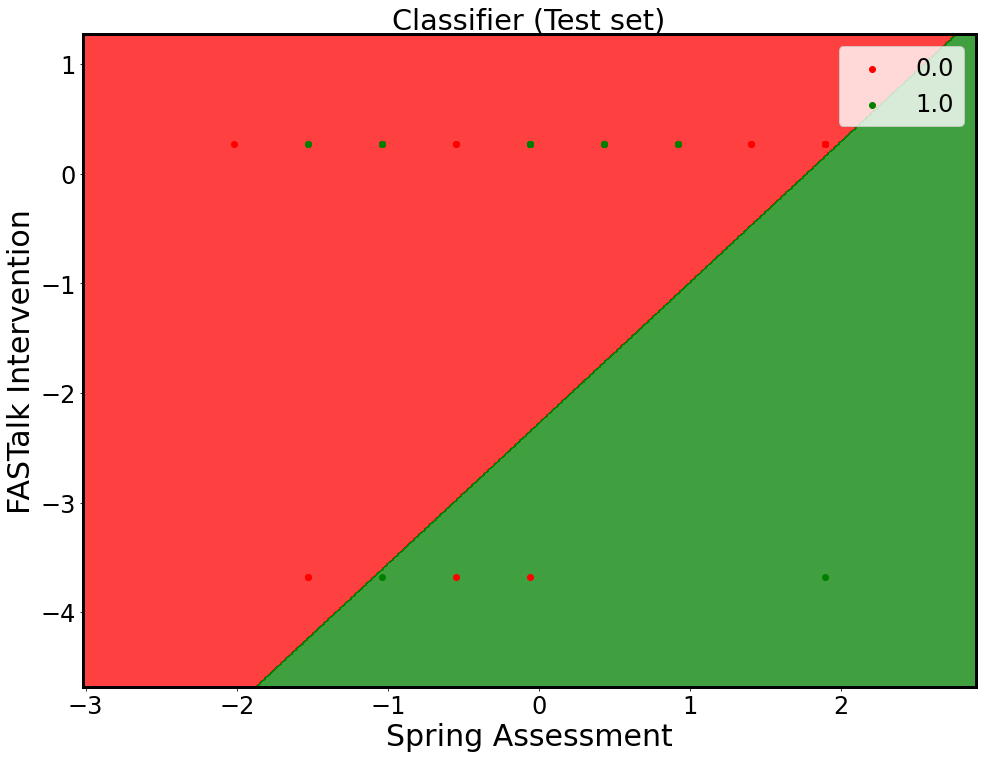

In [ ]:
#@title Model Accuracy

from matplotlib.colors import ListedColormap 

fig, ax = plt.subplots(figsize=(16,12))
X_set, y_set = xtest, ytest 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
							stop = X_set[:, 0].max() + 1, step = 0.01), 
					np.arange(start = X_set[:, 1].min() - 1, 
							stop = X_set[:, 1].max() + 1, step = 0.01)) 

plt.contourf(X1, X2, classifier.predict( 
			np.array([X1.ravel(), X2.ravel()]).T).reshape( 
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y_set)): 
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
				c = ListedColormap(('red', 'green'))(i), label = j) 
	
plt.title('Classifier (Test set)') 
plt.xlabel('Spring Assessment') 
plt.ylabel('FASTalk Intervention') 
plt.legend() 
plt.show() 


In [ ]:
#@title Model Attempt 2: Multiple Linear Regression

In [ ]:
df.columns

Index(['id', 'school', 'grade', 'gender', 'ethnicity', 'lunch_status',
       'english_proficiency', 'special_education', 'fasttalk_intervention',
       'fall_assessment', 'spring_assessment'],
      dtype='object')

In [ ]:
regression_variables = [
                        'gender',
                        #'lunch_status',
                        #turned out not to be signficant
                        'english_proficiency',
                        #'special_education',
                        'fasttalk_intervention']

df.gender = df.gender.astype('int')

In [ ]:
sen = df[df.special_education == 1]
no_sen = df[df.special_education == 0]

In [ ]:
# SM OLS
X = df[regression_variables]
y = df['spring_assessment']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:      spring_assessment   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     5.267
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           0.000463
Time:                        20:30:46   Log-Likelihood:                -447.38
No. Observations:                 214   AIC:                             904.8
Df Residuals:                     209   BIC:                             921.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.62

In [ ]:
# SEN SM OLS

X = sen[regression_variables]
y = sen['spring_assessment']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:      spring_assessment   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.419
Date:                Tue, 02 Jun 2020   Prob (F-statistic):              0.267
Time:                        20:31:42   Log-Likelihood:                -45.031
No. Observations:                  22   AIC:                             96.06
Df Residuals:                      19   BIC:                             99.34
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
gender                   -0.87

In [ ]:
# No-SEN SM OLS

X = no_sen[regression_variables]
y = no_sen['spring_assessment']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:      spring_assessment   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.351
Date:                Tue, 02 Jun 2020   Prob (F-statistic):             0.0738
Time:                        20:32:17   Log-Likelihood:                -401.02
No. Observations:                 192   AIC:                             810.0
Df Residuals:                     188   BIC:                             823.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.55

In [ ]:
from sklearn.linear_model import LinearRegression
X = df.loc[:, 'fasttalk_intervention'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.loc[:, 'spring_assessment'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
regressor = LinearRegression()  # create object for the class
regressor.fit(X, Y)  # perform linear regression
Y_pred = regressor.predict(X)  # make predictions

In [ ]:
got_fastalk = df[df.fasttalk_intervention==1]
no_fastalk = df[df.fasttalk_intervention==0]

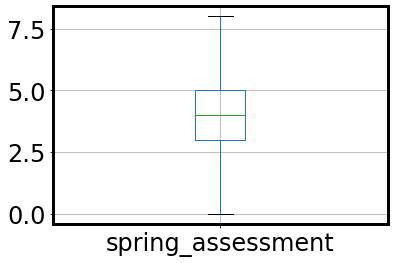

In [ ]:
df.boxplot(column='spring_assessment')

In [ ]:
df.spring_assessment.quantile(0.25)

3.0

In [ ]:
df.loc[df['fasttalk_intervention'] == 0].groupby('gender').count()

,id,school,grade,ethnicity,lunch_status,english_proficiency,special_education,fasttalk_intervention,fall_assessment,spring_assessment
gender,,,,,,,,,,
0,75,75,75,75,75,75,75,75,75,75
1,70,70,70,70,70,70,70,70,70,70


In [ ]:
df.loc[df['fasttalk_intervention'] == 1].groupby('gender').count()

,id,school,grade,ethnicity,lunch_status,english_proficiency,special_education,fasttalk_intervention,fall_assessment,spring_assessment
gender,,,,,,,,,,
0,33,33,33,33,33,33,33,33,33,33
1,36,36,36,36,36,36,36,36,36,36


In [ ]:
df.groupby('lunch_status').count()

,id,school,grade,gender,ethnicity,english_proficiency,special_education,fasttalk_intervention,fall_assessment,spring_assessment
lunch_status,,,,,,,,,,
0,17,17,17,17,17,17,17,17,17,17
1,197,197,197,197,197,197,197,197,197,197
